原文链接：https://www.aideeplearning.cn/%e5%9f%ba%e4%ba%8e%e6%94%af%e6%8c%81%e5%90%91%e9%87%8f%e6%9c%ba%ef%bc%88svm%ef%bc%89%e7%9a%84%e4%ba%ba%e8%84%b8%e8%af%86%e5%88%ab/

## 数据集加载与可视化

In [55]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces(data_home='data')

In [60]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [119]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [68]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [65]:
faces_images = faces.images
faces_images.shape

(400, 64, 64)

In [66]:
faces_data = faces.data
faces_data.shape

(400, 4096)

In [91]:
faces.target.shape

(400,)

from scipy.io import loadmat
data = loadmat(file_name="data/olivettifaces.mat")
print(data)
faces = data['faces'].T.copy()
faces = data['u']
# data['p'].shape
# data['u'].shape
data['v'].shape

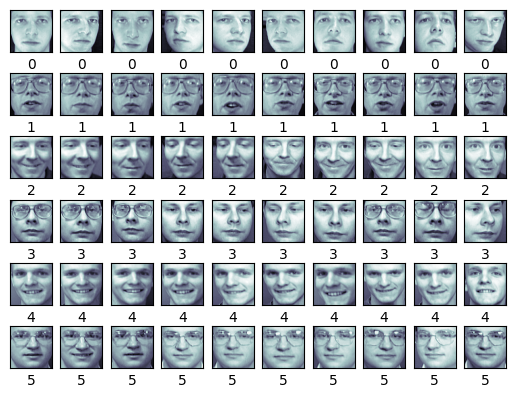

In [135]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target[i])

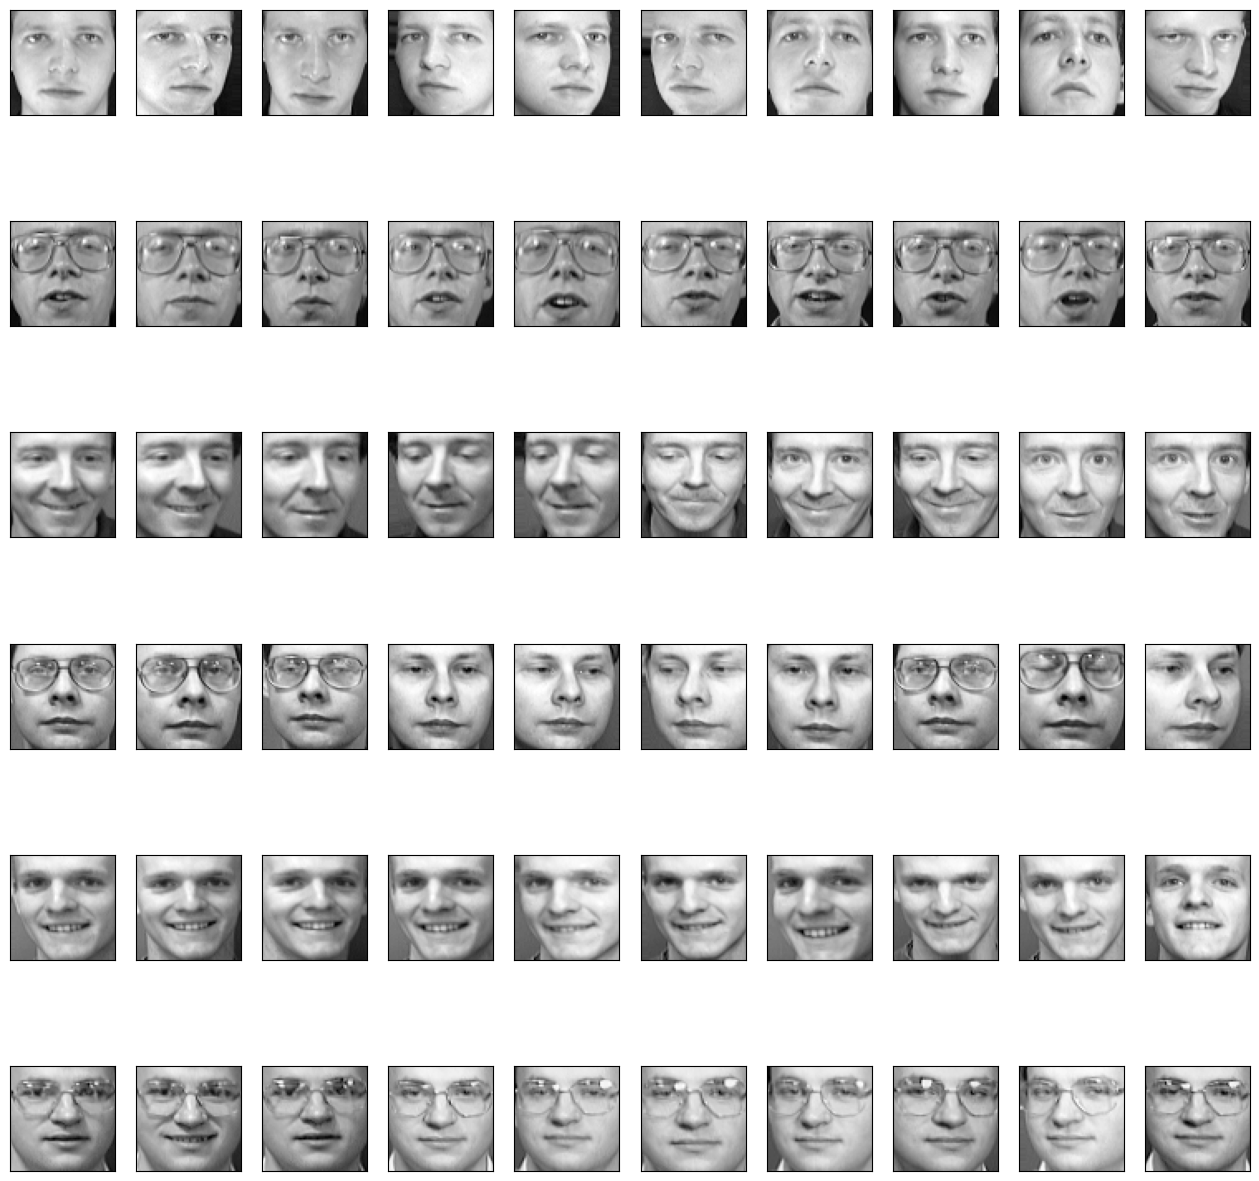

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16, 16))
for i in range(60):
    plt.subplot(6, 10, i+1)
    plt.imshow(faces_images[i], cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

## 使用 PCA 和 SVC 构建模型

In [72]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=42)
X_test
y_test

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37,  3, 22, 17,  3, 15, 12, 29, 25,  7, 10,  3, 35, 26,
       39,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28])

## 使用网格搜索 CV 查找最佳模型

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C': [1, 5, 10, 15],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
}

In [122]:
grid = GridSearchCV(model, param_grid=param_grid, cv=4)
%time grid.fit(X_train, y_train)

CPU times: total: 1min 37s
Wall time: 14.6 s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 15],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [123]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.001}

In [124]:
{'svc__C': 1, 'svc__gamma': 0.005}

{'svc__C': 1, 'svc__gamma': 0.005}

In [125]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.001))])

## 使用最佳模型进行预测

In [126]:
final_model = grid.best_estimator_
y_pred = final_model.predict(X_test)

## 可视化数据

Text(0.5, 0.98, 'Predicted Names: Incorrected Labels in Red')

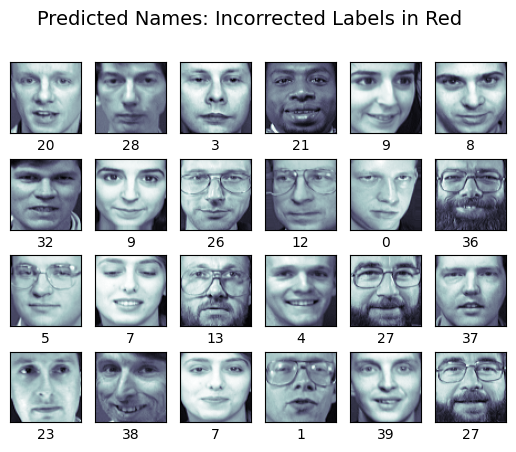

In [153]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(64, 64), cmap='bone')
    axi.set(xticks=[], yticks=[])
#     print(i)
#     print(y_pred[i])
#     print(y_test[i])
    axi.set_xlabel(y_pred[i],
                  color='black' if y_pred[i] == y_test[i]
                  else 'red')
fig.suptitle('Predicted Names: Incorrected Labels in Red', size=14)

## 模型评估指标

In [164]:
from sklearn.metrics import classification_report
print(faces.target.shape)
# print(classification_report(y_test, y_pred, target_names=faces.target))
print(classification_report(y_test, y_pred))

(400,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       0.33      0.50      0.40         2
           3       0.80      1.00      0.89         4
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1

C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.T
print(cm)

[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Text(50.722222222222214, 0.5, 'Predicated Labels')

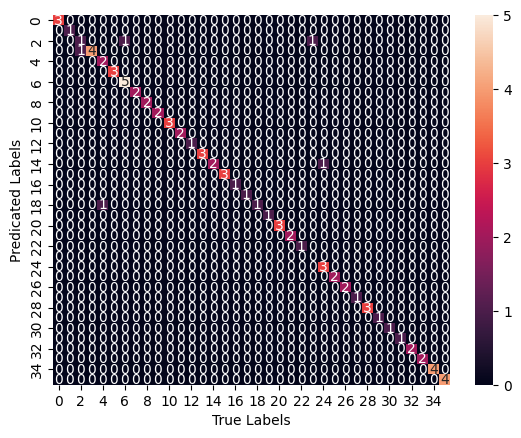

In [138]:
import seaborn as sns
sns.heatmap(data=cm, annot=True)
#             ,
#            xticklabels=faces.target,
#            yticklabels=faces.target)
plt.xlabel('True Labels')
plt.ylabel('Predicated Labels')